**Análise e exploração dos Dados**

Durante essa fase a análise e exploração dos dados deve ser realizada, por meio das etapas de:

*   Preparar os dados
*   Analisar os atributos
*   Analisar as relações entre os atributos de forma bivariada e multivariada
*   Identificar possíveis casos atípicos
*   Avaliar a presença de dados ausentes
*   Avaliar suposições básicas

link da base de dados:

https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import preprocessing

In [ ]:
# dados é um DataFrame
# df_combustiveis = pd.read_csv("/content/ca-2004-01.csv",sep=";")

In [2]:
# Links dos arquivos CSV
links_csv = [
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-01.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-02.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-03.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-04.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-05.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-07.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-08.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-09.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-10.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-11.csv',
    'https://raw.githubusercontent.com/SandraRojasZ/DataScience/main/bases/precos-gasolina-etanol-12.csv'
]

In [3]:
# Lista para armazenar os DataFrames
dataframes = []

# Ler cada arquivo CSV e adicionar à lista
for link in links_csv:
    df = pd.read_csv(link, sep=';')
    dataframes.append(df)

# Concatenar todos os DataFrames em um único DataFrame
df_combustiveis = pd.concat(dataframes, ignore_index=True)

In [ ]:
df_combustiveis.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,01/01/2024,"3,99",NaN,R$ / litro,VIBRA


In [ ]:
df_combustiveis.tail(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
560767,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,GASOLINA,31/12/2024,"6,39",NaN,R$ / litro,ALE
560768,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,GASOLINA ADITIVADA,31/12/2024,"6,39",NaN,R$ / litro,ALE
560769,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,ETANOL,31/12/2024,"4,39",NaN,R$ / litro,ALE


In [ ]:
df_combustiveis.dtypes

,0
Regiao - Sigla,object
Estado - Sigla,object
Municipio,object
Revenda,object
CNPJ da Revenda,object
Nome da Rua,object
Numero Rua,object
Complemento,object
Bairro,object
Cep,object


In [ ]:
# Outra forma de verificar o Dtype e a quantidade de Range, assim como dados das colunas
df_combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560770 entries, 0 to 560769
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     560770 non-null  object 
 1   Estado - Sigla     560770 non-null  object 
 2   Municipio          560770 non-null  object 
 3   Revenda            560770 non-null  object 
 4   CNPJ da Revenda    560770 non-null  object 
 5   Nome da Rua        560770 non-null  object 
 6   Numero Rua         560639 non-null  object 
 7   Complemento        124456 non-null  object 
 8   Bairro             559850 non-null  object 
 9   Cep                560770 non-null  object 
 10  Produto            560770 non-null  object 
 11  Data da Coleta     560770 non-null  object 
 12  Valor de Venda     560770 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  560770 non-null  object 
 15  Bandeira           560770 non-null  object 
dtypes:

In [ ]:
df_combustiveis.isnull()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560765,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
560766,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
560767,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
560768,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_combustiveis.isnull().sum()

,0
Regiao - Sigla,0
Estado - Sigla,0
Municipio,0
Revenda,0
CNPJ da Revenda,0
Nome da Rua,0
Numero Rua,131
Complemento,436314
Bairro,920
Cep,0


In [ ]:
df_combustiveis.shape

(560770, 16)

In [ ]:
nulos_valor_compra = 560770/560770
nulos_valor_compra

1.0

<Axes: >

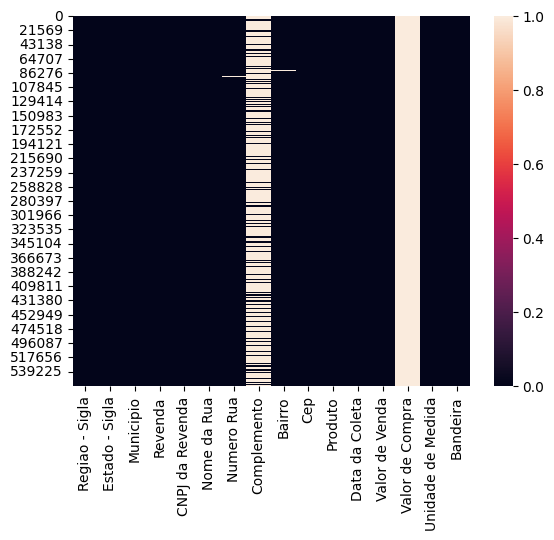

In [ ]:
# Para verificar os valores ausentes por coluna de forma visual
sns.heatmap(df_combustiveis.isnull())

In [ ]:
df_combustiveis.columns.tolist()

['Regiao - Sigla',
 'Estado - Sigla',
 'Municipio',
 'Revenda',
 'CNPJ da Revenda',
 'Nome da Rua',
 'Numero Rua',
 'Complemento',
 'Bairro',
 'Cep',
 'Produto',
 'Data da Coleta',
 'Valor de Venda',
 'Valor de Compra',
 'Unidade de Medida',
 'Bandeira']

In [7]:
# Removendo colunas dados micros em que são repetidos, visto que já se tem os mesmo dados no macro como Região, Estado, Municipio
# Removi também CNPJ da Revenda porque já há o nome Revenda para análise
# Removi Valor Compra porque não há nenhum dado
# axis = 1 porque estou removendo as colunas

df_combustiveis_2 = df_combustiveis.drop([ 'CNPJ da Revenda','Nome da Rua','Numero Rua', 'Complemento', 'Bairro', 'Cep','Valor de Compra'], axis = 1)

In [8]:
df_combustiveis_2.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA,01/01/2024,"5,68",R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA ADITIVADA,01/01/2024,"5,68",R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,01/01/2024,"3,99",R$ / litro,VIBRA


In [9]:
# Verificando se os nulos foram tratados
df_combustiveis_2.isnull().sum()

,0
Regiao - Sigla,0
Estado - Sigla,0
Municipio,0
Revenda,0
Produto,0
Data da Coleta,0
Valor de Venda,0
Unidade de Medida,0
Bandeira,0


In [10]:
# para que a conversão ocorra com sucesso primeiro foi alterado ','  para '.', logo em seguir se transforma a string (Valor) para float
df_combustiveis_2['Valor de Venda'] = df_combustiveis_2['Valor de Venda'].str.replace(',', '.').astype(float)

In [ ]:
# df_combustiveis_2['Data da Coleta'] = pd.to_datetime(df_combustiveis_2['Data da Coleta'], format='%d/%m/%Y')

In [11]:
df_combustiveis_2.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA,01/01/2024,5.68,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA ADITIVADA,01/01/2024,5.68,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,01/01/2024,3.99,R$ / litro,VIBRA


In [12]:
# Verificando se mudou os valores para float
df_combustiveis_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560770 entries, 0 to 560769
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     560770 non-null  object 
 1   Estado - Sigla     560770 non-null  object 
 2   Municipio          560770 non-null  object 
 3   Revenda            560770 non-null  object 
 4   Produto            560770 non-null  object 
 5   Data da Coleta     560770 non-null  object 
 6   Valor de Venda     560770 non-null  float64
 7   Unidade de Medida  560770 non-null  object 
 8   Bandeira           560770 non-null  object 
dtypes: float64(1), object(8)
memory usage: 38.5+ MB


In [ ]:
cat_col = [col for col in df_combustiveis_2.columns if df_combustiveis_2[col].dtype == 'object']
cat_col

['Regiao - Sigla',
 'Estado - Sigla',
 'Municipio',
 'Revenda',
 'Produto',
 'Data da Coleta',
 'Unidade de Medida',
 'Bandeira']

In [ ]:
# dados numéricos
num_col = [col for col in df_combustiveis_2.columns if df_combustiveis_2[col].dtype != 'object']
num_col

['Valor de Venda']

In [ ]:
# contar o número de valores únicos em uma série ou em uma coluna de um DataFrame.
df_combustiveis_2[cat_col].nunique()

,0
Regiao - Sigla,5
Estado - Sigla,27
Municipio,459
Revenda,9656
Produto,3
Data da Coleta,250
Unidade de Medida,1
Bandeira,51


In [13]:
df_combustiveis_2['Produto'].unique()

array(['GASOLINA', 'GASOLINA ADITIVADA', 'ETANOL'], dtype=object)

In [ ]:
# df_combustiveis_2['Ano'] = df_combustiveis_2['Data da Coleta'].dt.year
# df_combustiveis_2['Mes'] = df_combustiveis_2['Data da Coleta'].dt.month

In [14]:
df_combustiveis_2.describe()

,Valor de Venda
count,560770.000000
mean,5.389385
std,1.021793
min,2.630000
25%,4.470000
50%,5.780000
75%,6.140000
max,9.790000


In [ ]:
df_combustiveis_2.corr(method='pearson', numeric_only=True)

,Valor de Venda
Valor de Venda,1.0


<Axes: >

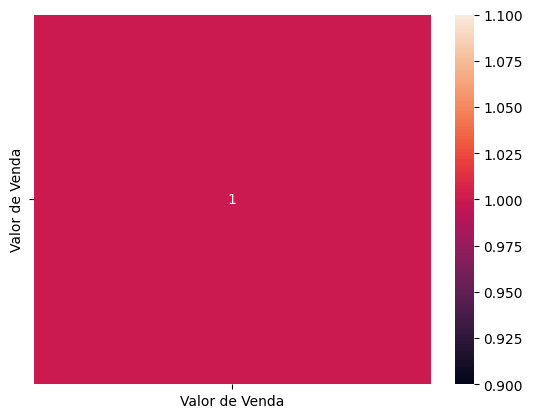

In [ ]:
# correlação vem da covariância (expressa um momento entre as variáveis)
# variavel dependente
# Valor de Venda é dependente das outras
# proxima de zero dispensa
# Tenho que transformar os categóricos em numeros para ver as correlações? Sim para isso tem que transformar em variaveis categoricas
# quantidade de correlações altas tem a chance de serem variaveis independentes, de serem atributos chaves e não podem ser retiradas
#

sns.heatmap(df_combustiveis_2.corr(method='pearson', numeric_only=True), annot=True)

<Axes: >

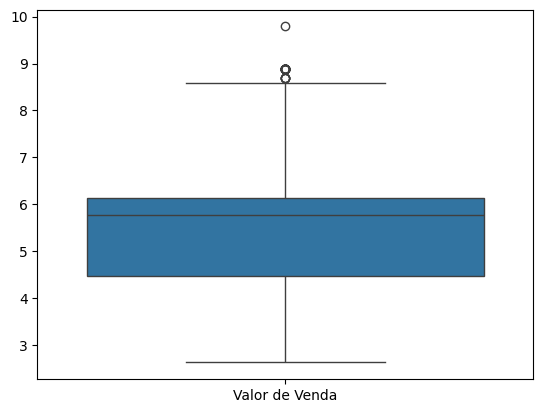

In [15]:
# Verificando outliers
sns.boxplot(data=df_combustiveis_2)

In [16]:
# Tratamento dos outliers
# IRQ
Q3, Q1 = np.quantile(df_combustiveis_2['Valor de Venda'], [0.75, 0.25])
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)
df_limpo = df_combustiveis_2[(df_combustiveis_2['Valor de Venda'] >= limite_inferior)&(df_combustiveis_2['Valor de Venda'] <= limite_superior)]

<Axes: ylabel='Valor de Venda'>

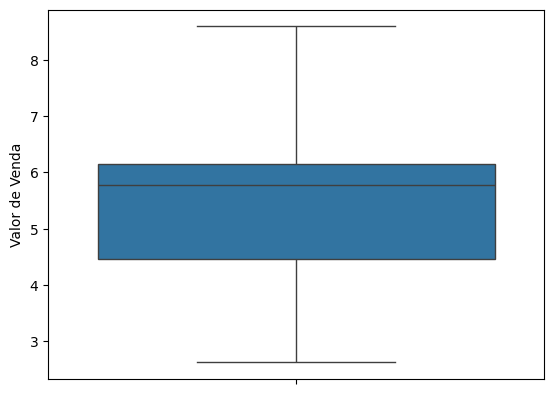

In [ ]:
sns.boxplot(data=df_limpo['Valor de Venda'])

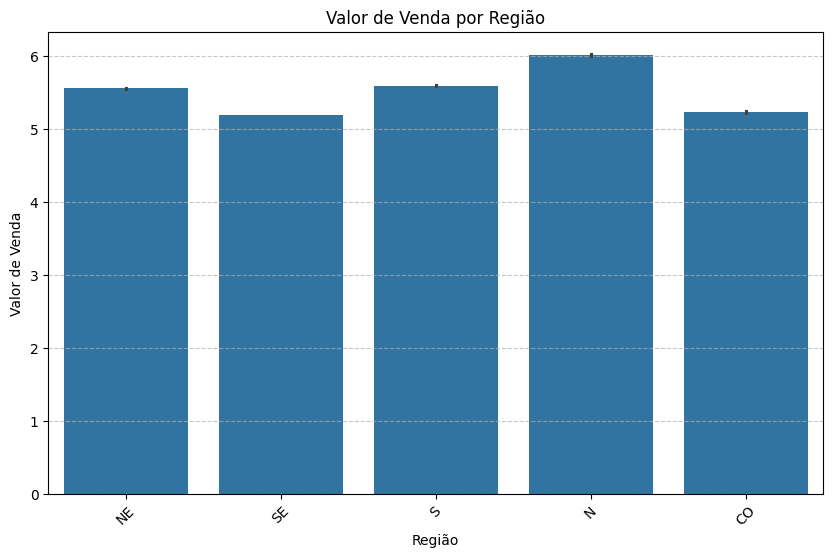

In [17]:
#A região no Norte tem em média o maior valor de venda e o Sudeste em média o menor valor
plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x='Regiao - Sigla', y='Valor de Venda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Valor de Venda por Região')
plt.xlabel('Região')
plt.ylabel('Valor de Venda')
plt.xticks(rotation=45)
plt.show()

In [26]:
grupo_regiao = df_limpo.groupby('Regiao - Sigla')
grupo_regiao.mean(numeric_only=True)

,Valor de Venda
Regiao - Sigla,
CO,5.240389
N,6.020116
NE,5.561480
S,5.600270
SE,5.196370


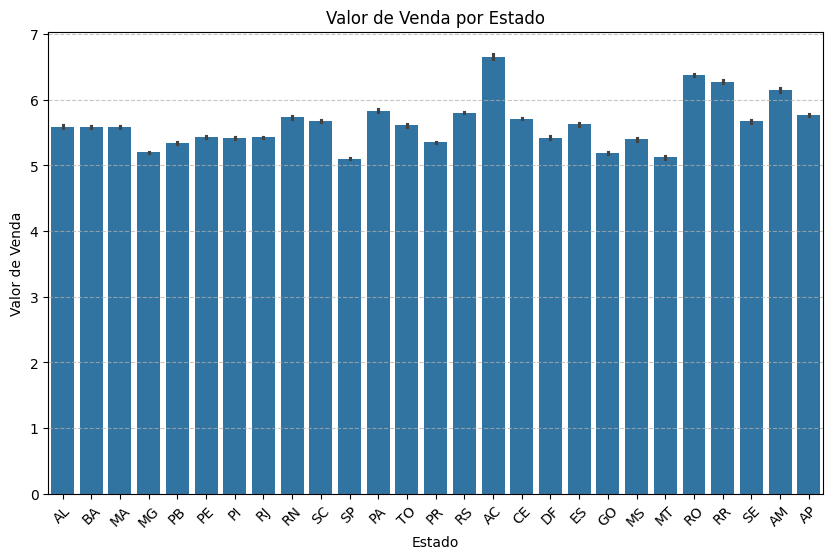

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_limpo, x="Estado - Sigla", y="Valor de Venda", hue='Regiao - Sigla')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Valor de Venda por Estado')
plt.xlabel('Estado')
plt.ylabel('Valor de Venda')
plt.xticks(rotation=45)
plt.show()

In [36]:
# o preço médio mais barato é no Estado de São Paulo
grupo_re_est = df_limpo.groupby(['Regiao - Sigla', 'Estado - Sigla'])
grupo_re_est.mean(numeric_only=True)

Valor de Venda
Regiao - Sigla Estado - Sigla                
CO             DF                    5.424747
               GO                    5.185859
               MS                    5.397397
               MT                    5.121054
N              AC                    6.657269
               AM                    6.151255
               AP                    5.771169
               PA                    5.836207
               RO                    6.373171
               RR                    6.275177
               TO                    5.608493
NE             AL                    5.588632
               BA                    5.582552
               CE                    5.712945
               MA                    5.586959
               PB                    5.337553
               PE                    5.434438
               PI                    5.413054
               RN                    5.735185
               SE                    5.672732
S              PR                    5.351780
               RS                    5.801707
               SC                    5.675923
SE             ES                    5.623609
               MG                    5.201753
               RJ                    5.429543
               SP                    5.101414

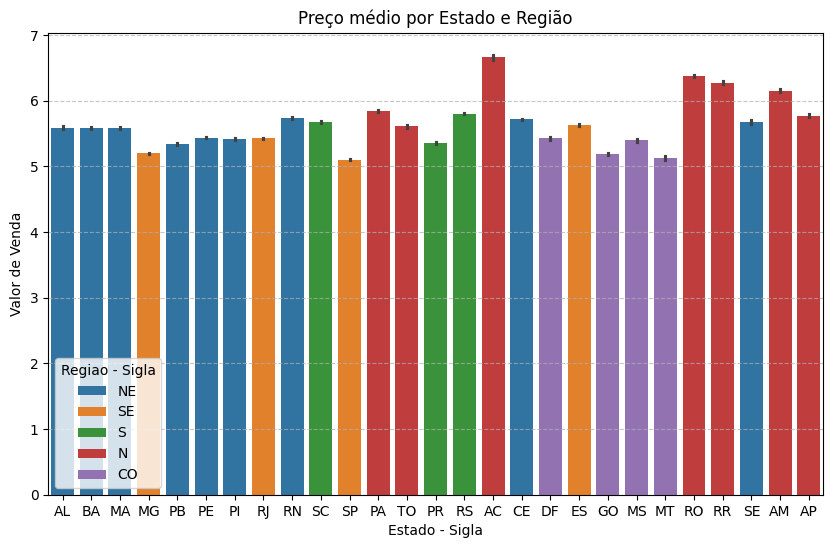

In [78]:
# parâmetro hue é usado para adicionar uma dimensão adicional ao gráfico
# o preço médio mais caro é no Estado do Acre da Região Norte
plt.figure(figsize=(10,6))
sns.barplot(data=df_limpo, x='Estado - Sigla', y='Valor de Venda', hue='Regiao - Sigla')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Preço médio por Estado e Região")
plt.show()

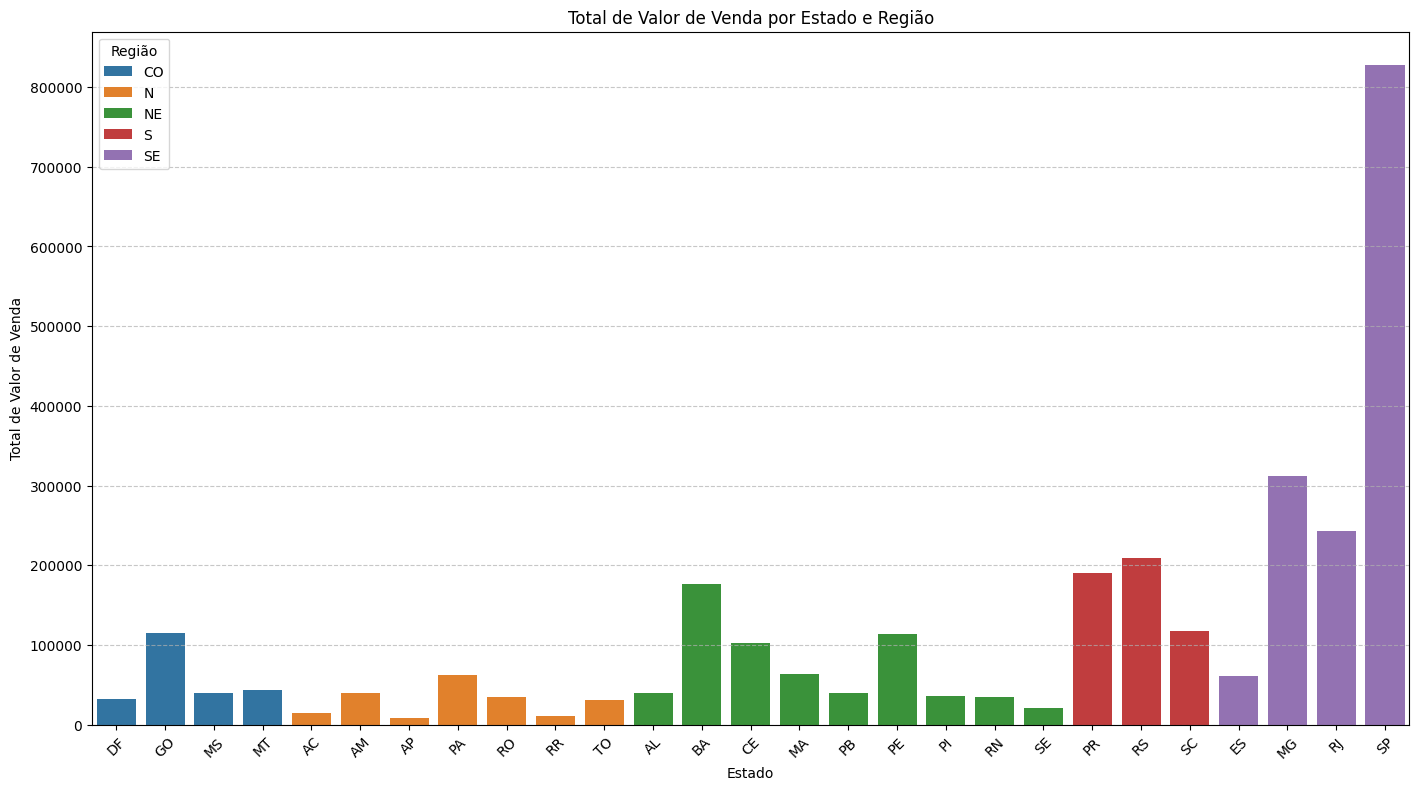

In [82]:
# Embora no Norte o preço seja mais caro, a venda é maior no Sudeste principalmente no Estado de São Paulo

# alpha=0.7: Define a transparência da grade. O valor varia de 0 (totalmente transparente) a 1 (totalmente opaco).
"""
Quando você agrupa dados, as colunas usadas para o agrupamento se tornam o índice do DataFrame resultante.
O reset_index() transforma essas colunas de volta em colunas normais do DataFrame, em vez de mantê-las como índice.
"""
total_venda_regiao = df_limpo.groupby(['Regiao - Sigla', 'Estado - Sigla'])['Valor de Venda'].sum().reset_index()

plt.figure(figsize=(17, 9))
sns.barplot(data=total_venda_regiao, x='Estado - Sigla', y='Valor de Venda', hue='Regiao - Sigla')
plt.title('Total de Valor de Venda por Estado e Região')
plt.xlabel('Estado')
plt.ylabel('Total de Valor de Venda')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

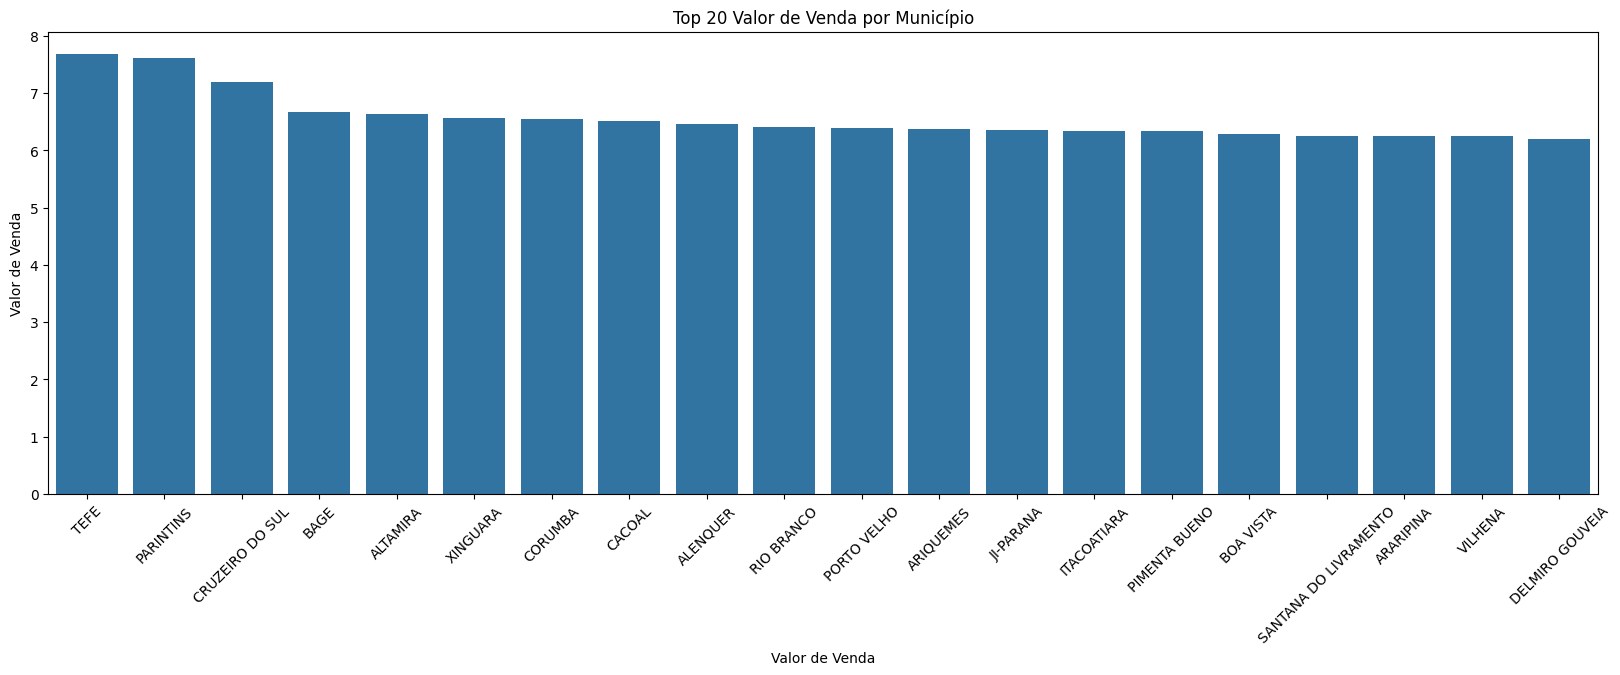

In [85]:
# Na cidade Tefe se tem o preço médio mais caro
plt.figure(figsize=(20,6))
top_20_municipio = df_limpo.groupby('Municipio')['Valor de Venda'].mean().nlargest(20).reset_index()
sns.barplot(data=top_20_municipio, x="Municipio", y="Valor de Venda")
plt.title('Top 20 Valor de Venda por Município')
plt.xlabel('Valor de Venda')
plt.xticks(rotation=45)
plt.show()

In [96]:
preco_municipio = df_limpo.groupby(['Regiao - Sigla', 'Municipio'])['Valor de Venda'].mean().reset_index()
preco_municipio = preco_municipio.sort_values(by='Valor de Venda', ascending=False)
preco_municipio.head(20)

,Regiao - Sigla,Municipio,Valor de Venda
66,N,TEFE,7.678211
58,N,PARINTINS,7.605809
45,N,CRUZEIRO DO SUL,7.183865
173,S,BAGE,6.664359
34,N,ALTAMIRA,6.629798
68,N,XINGUARA,6.566686
9,CO,CORUMBA,6.543017
41,N,CACOAL,6.515138
33,N,ALENQUER,6.451667
63,N,RIO BRANCO,6.413091


In [92]:
# Embora o preço mais caro seja na cidade Tefe, o total de venda é maior no Município de São Paulo da Região Sudeste
venda_municipio = df_limpo.groupby(['Regiao - Sigla', 'Municipio'])['Valor de Venda'].sum().reset_index()
# Ordenando os resultados em ordem decrescente com base na coluna 'Valor de Venda'
venda_municipio = venda_municipio.sort_values(by='Valor de Venda', ascending=False)
venda_municipio.head(20)

,Regiao - Sigla,Municipio,Valor de Venda
423,SE,SAO PAULO,146817.76
404,SE,RIO DE JANEIRO,57538.83
98,NE,FORTALEZA,34976.69
196,S,CURITIBA,33560.67
4,CO,BRASILIA,31778.17
275,SE,BELO HORIZONTE,29182.71
14,CO,GOIANIA,28410.68
52,N,MANAUS,28005.07
227,S,PORTO ALEGRE,20691.30
145,NE,RECIFE,19603.49


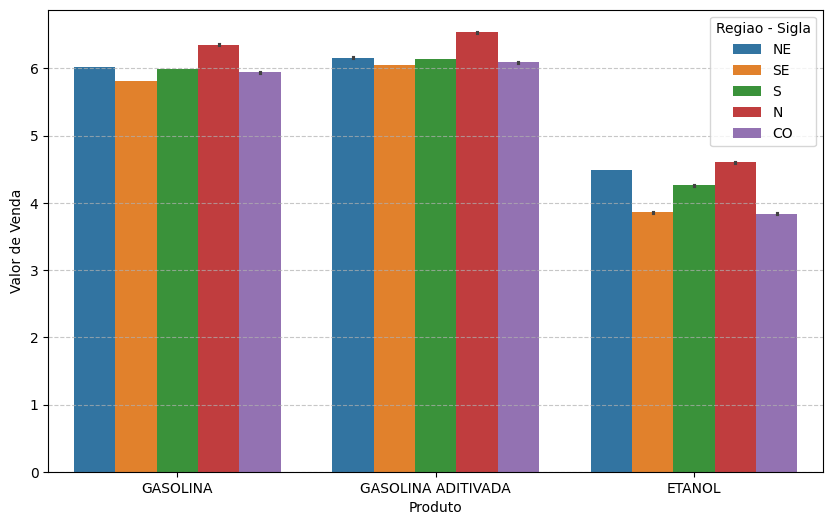

In [50]:
 # Produto mais caro em média é a Gasolina Aditiva principalmente na região Norte
 # Em todas as Região a média do preço do Etanol é menor em relação aos demais produtos
plt.figure(figsize=(10,6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.barplot(data=df_limpo, x='Produto', y='Valor de Venda', hue='Regiao - Sigla')
plt.show()

In [97]:
# A Região do Sudeste é destaque com relação as vendas principalmente do produto Gasolina aditivada
venda_produto = df_limpo.groupby(['Regiao - Sigla', 'Municipio', 'Produto'])['Valor de Venda'].sum().reset_index()
# Ordenando os resultados em ordem decrescente com base na coluna 'Valor de Venda'
venda_produto = venda_produto.sort_values(by='Valor de Venda', ascending=False)
venda_produto.head(5)

,Regiao - Sigla,Municipio,Produto,Valor de Venda
1268,SE,SAO PAULO,GASOLINA ADITIVADA,55473.67
1267,SE,SAO PAULO,GASOLINA,55436.89
1266,SE,SAO PAULO,ETANOL,35907.20
1211,SE,RIO DE JANEIRO,GASOLINA ADITIVADA,22005.74
1210,SE,RIO DE JANEIRO,GASOLINA,21587.02


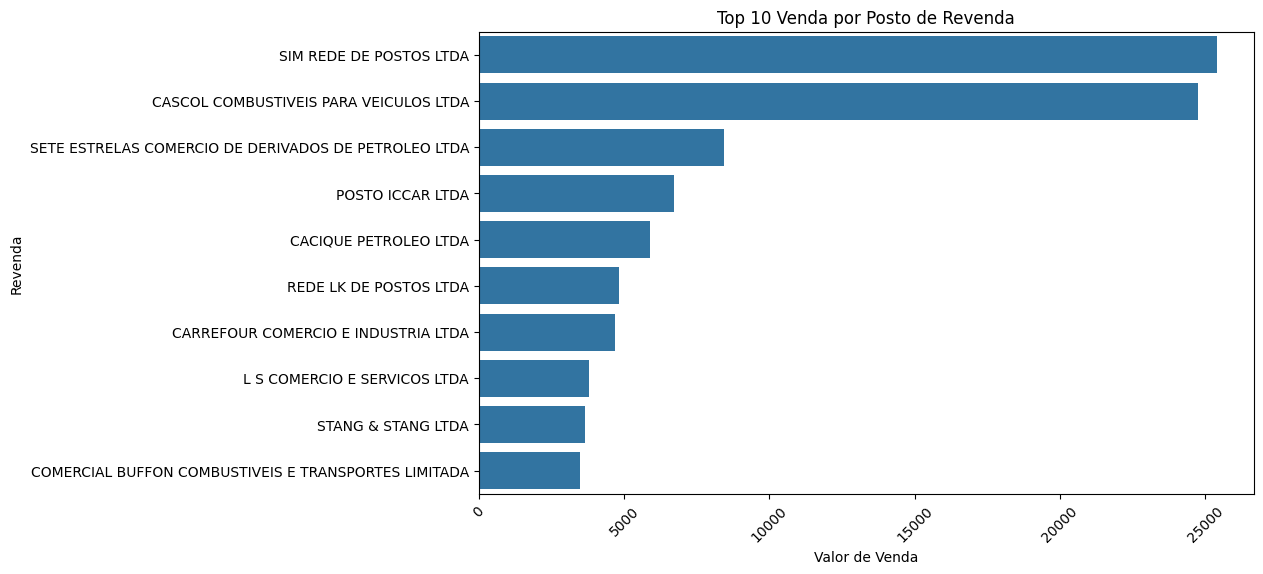

In [65]:
# O posto Revenda SIM REDE DE POSTOS LTDA apresenta o maior valor total de vendas
plt.figure(figsize=(10,6))
top_10_postos = df_limpo.groupby('Revenda')['Valor de Venda'].sum().nlargest(10).reset_index()
sns.barplot(data=top_10_postos, y="Revenda", x="Valor de Venda")
plt.title('Top 10 Venda por Posto de Revenda')
plt.xticks(rotation=45)
plt.show()

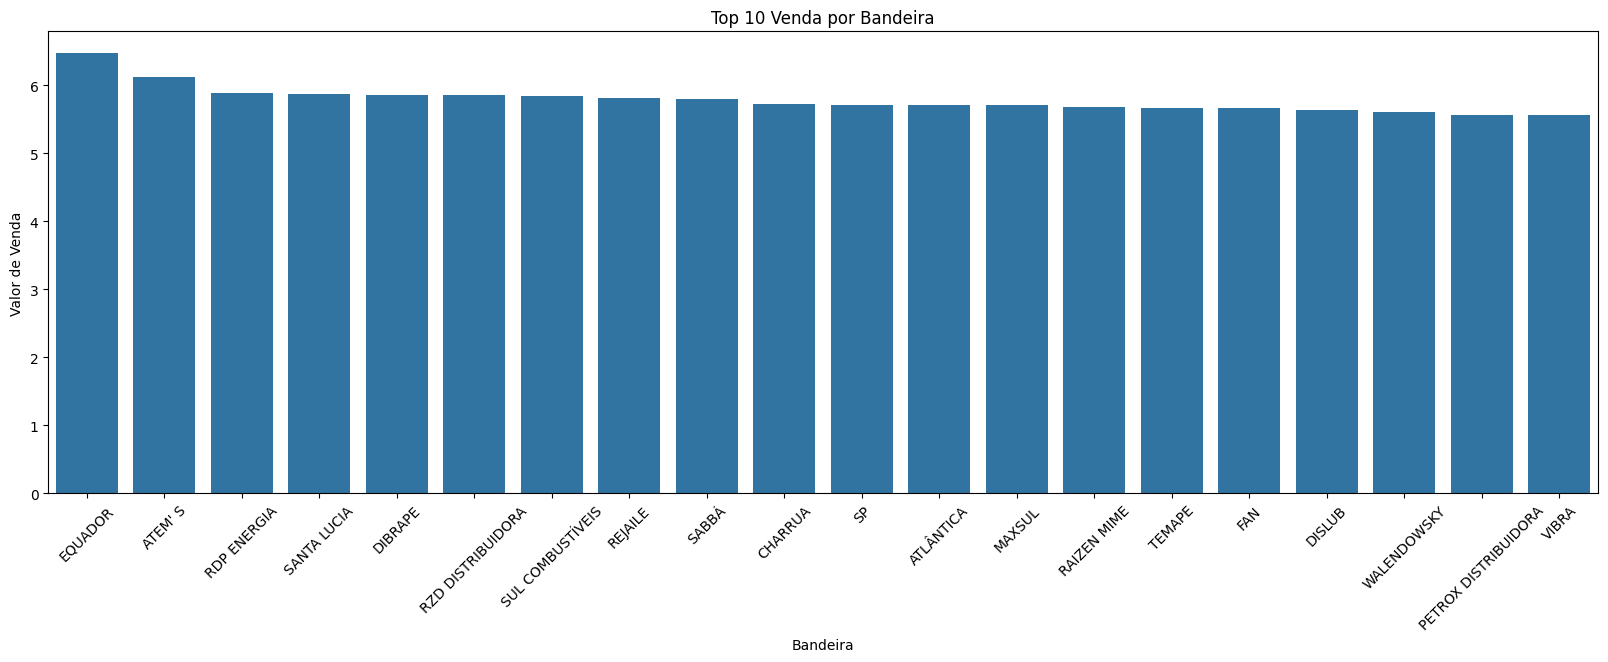

In [70]:
# O preço médio mais caro é da Bandeira Equador
plt.figure(figsize=(20,6))
top_10_bandeira = df_limpo.groupby('Bandeira')['Valor de Venda'].mean().nlargest(20).reset_index()
sns.barplot(data=top_10_bandeira, x="Bandeira", y="Valor de Venda")
plt.title('Top 10 Venda por Bandeira')
plt.xticks(rotation=45)
plt.show()

In [53]:
df_limpo.nunique()

,0
Regiao - Sigla,5
Estado - Sigla,27
Municipio,459
Revenda,9656
Produto,3
Data da Coleta,250
Valor de Venda,520
Unidade de Medida,1
Bandeira,51
